In [1]:
from astropy.io import ascii
from astropy.table import Table, Column, join
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
from astropy.coordinates import SkyCoord
from astropy import units as u
import time

In [2]:
data1 = ascii.read('Data/data1.nzpcat', data_start = 0, header_start = 0, delimiter = ' ')
data2 = ascii.read('Data/data2.cat', data_start = 0, header_start = 0, delimiter = ' ')

In [3]:
ls1 = []
ls2 = []
li1 = list(data1['id'])
lr1 = list(data1['ra'])
ld1 = list(data1['dec'])
li2 = list(data2['id'])
lr2 = list(data2['ra'])
ld2 = list(data2['dec'])
ls1.append(li1)
ls1.append(lr1)
ls1.append(ld1)
ls2.append(li2)
ls2.append(lr2)
ls2.append(ld2)

In [4]:
l = []
n = 10000
a = time.time()
for i in range(n):
    for j in range(n):
        ls = []
        if(ls1[1][i]-ls2[1][j]<0.000001 and ls1[1][i]-ls2[1][j]>-0.000001 and ls1[2][i]-ls2[2][j]<0.000001 and ls1[2][i]-ls2[2][j]>-0.000001):
            ls.append(ls1[0][i])
            ls.append(ls2[0][j])
            l.append(ls)
b = time.time()
b-a

31.620078563690186

In [5]:
y1 = []
y2 = []
for i in range(len(l)):
    id1 = int(l[i][0]) - 1
    id2 = int(l[i][1]) - 1
    if(data1[id1]['f_f160w']<0 or data2[id2]['f_F160W']<0):
        l[i] = [0, 0]

In [6]:
for i in range(len(l)):
    if(l[i]!=[0, 0]):
        id1 = int(l[i][0]) - 1
        id2 = int(l[i][1]) - 1
        y2.append(-2.5*log10(data2[id2]['f_F160W']) + 25)
        y1.append(-2.5*log10(data1[id1]['f_f160w']) + 25)

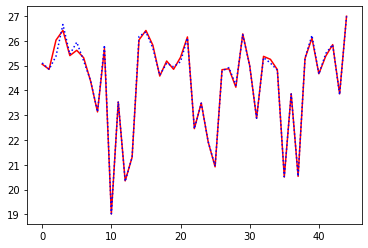

In [7]:
plt.plot(y1, 'r-')
plt.plot(y2, 'b:')

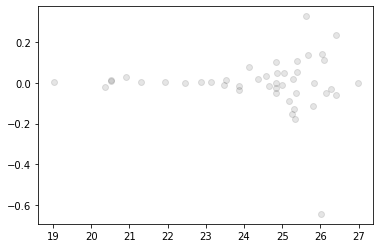

In [8]:
e = []
for i in range(len(y2)):
    e.append(y2[i]-y1[i])
plt.scatter(y1, e, c = "black", alpha = 0.1)